# Logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Generate sample data

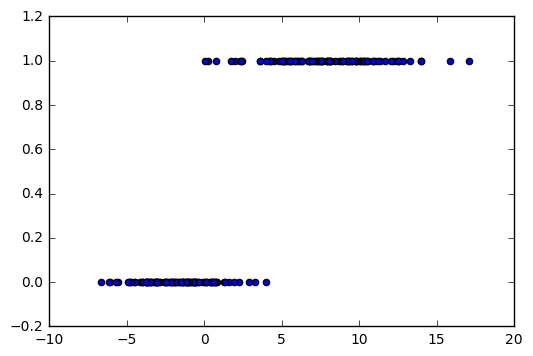

In [39]:
x1 = np.random.normal(-2, 2, 100)
x2 = np.random.normal(8, 3, 100)
x_train = np.append(x1, x2)
y_train = np.asarray([0.0] * len(x1) + [1.0] * len(x2))

plt.scatter(x_train, y_train)
plt.show()

## Now define TF model

We first apply regression and then normalize the output by sigmoid function.

In [47]:
learning_rate = 0.001
epochs = 100000

# Placeholders for data
X = tf.placeholder(tf.float32, shape=(None,), name='X')
y = tf.placeholder(tf.float32, shape=(None,), name='y')

# Model 
W = tf.Variable([0.1, 0.1])
model_op = tf.sigmoid(W[1]*X + W[0])
entropy = -y * tf.log(model_op) - (1.0-y) * tf.log(1.0 - model_op)
loss_op = tf.reduce_sum(entropy) / len(x_train)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_error = 0.0
    for i in range(epochs):
        err, _ = sess.run([loss_op, train_op], {X:x_train, y:y_train})
        if abs(prev_error - err) < 1e-6:
            print('loss: %f' % err)
            break
        prev_error = err
        if i % 1000 == 0:
            print('loss: %f' % err)
    w_vals = sess.run(W)

loss: 0.509369
loss: 0.252966
loss: 0.222900
loss: 0.206149
loss: 0.194060
loss: 0.184440
loss: 0.176433
loss: 0.169608
loss: 0.163712
loss: 0.158571
loss: 0.154059
loss: 0.150080
loss: 0.146555
loss: 0.143419
loss: 0.140619
loss: 0.138110
loss: 0.135853
loss: 0.133817
loss: 0.131975
loss: 0.130302
loss: 0.128780
loss: 0.127391
loss: 0.126120
loss: 0.124954
loss: 0.123882
loss: 0.123824


## Lets visualize our result

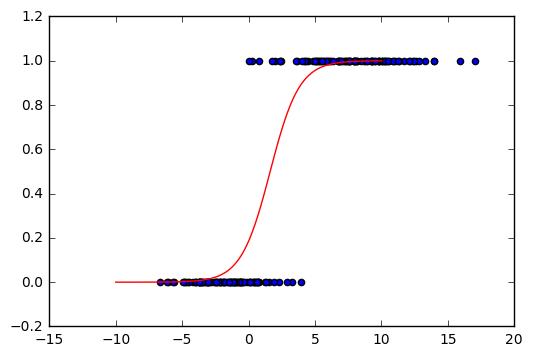

In [48]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

xs2 = np.linspace(-10, 10, 100)
plt.scatter(x_train, y_train)
plt.plot(xs2, sigmoid(w_vals[1]*xs2 + w_vals[0]), color='r')
plt.show()